# Solutions

## Environment setup

In [ ]:
# for Google Colab
import os
if 'COLAB_JUPYTER_IP' in os.environ:
    print('hello')
    !git clone https://github.com/bokulich-lab/DataVisualizationBook.git book

    from book.utils import ensure_packages
    ensure_packages('book/requirements.txt')

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
%config InlineBackend.figure_format='svg'

FONT_FAMILY = 'DejaVu Sans'
FONT_SCALE = 1.3

data_dir = '../data'

## Data pre-processing

All the exercises are based on the Kaggle [**cereals**](https://www.kaggle.com/code/hiralmshah/nutrition-data-analysis-from-80-cereals) dataset, which has 77 records and 16 columns containing nutritional information on different brands of breakfast cereals. The columns are:
- **name** - name of the cereal
- **mfr** - manufacturer of the cereals. You can find the association of the letter in the dataset with the real name in the `manufacturers_df` we have loaded below.
- **type** - hot or cold, the preferred way of eating
- **calories** - amount of calories
- **fat** - grams of fat
- **sodium** - milligrams of sodium
- **fiber** - amount in grams
- **carbo** - amount of carbohydrates in grams
- **sugars** - amount in gram
- **potass** - amount in milligrams
- **vitamins** - vitamins and minerals (0, 25, 100) as a percentage of the Recommended Dietary Intake
- **shelf** - shelf they appear in supermarket (1, 2 or 3 from the floor)
- **weight** - weight in ounces
- **cups** - number of cups
- **rating** - rating of the cereals

````{admonition} Note
All the values are expresed per 100g portion.
````

In [2]:
# load main dataset
cereals_df = pd.read_csv(f'{data_dir}/cereal.csv', sep=',')
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
# load dataset that maps manufacturer letter codes to their names
manufacturers_df = pd.read_csv(f'{data_dir}/manufacturers.csv', index_col=0)
manufacturers_df

,company_name
letter,
A,American Home Food Products
G,General Mills
K,Kelloggs
N,Nabisco
P,Post
Q,Quaker Oats
R,Ralston Purina


In [4]:
# merge the two datasets
cereals = pd.merge(
    cereals_df, manufacturers_df, left_on=cereals_df.mfr, right_index=True
)
# remove duplicated column
cereals.drop('key_0', axis=1, inplace=True)
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,company_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,Nabisco
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,Nabisco
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,Nabisco
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,Nabisco


## Exercises

### Exercise 1
Plot the **number of products per manufacturer** by displaying the manufacturer's name instead of the letter that appears in the `cereals_df` dataframe. All the data you need is found in the `cereals` DataFrame.

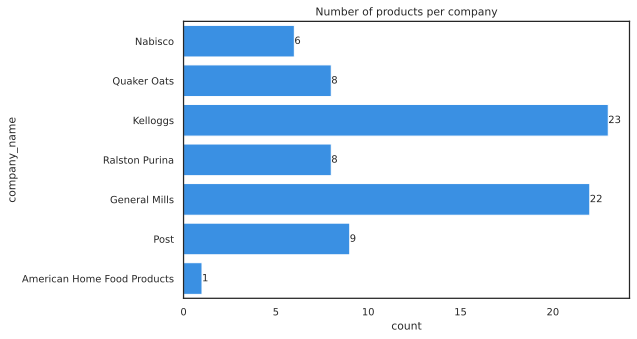

In [5]:
sns.set_theme(
    rc={'figure.figsize': (8, 5), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=0.9):
    # seaborn's countplot
    ax = sns.countplot(
        data=cereals[['company_name', 'name']],
        y='company_name',
        color='dodgerblue' 
    )

    # display the number of products for each company
    ax.bar_label(ax.containers[0], size=10)
    ax.set_title('Number of products per company')

### Exercise 2
Plot the **distribution of ratings per company** checking at the same time if there are any **outliers**. You can find the necessary data in the `data` DataFrame.

In [6]:
data = cereals[['company_name', 'rating']]

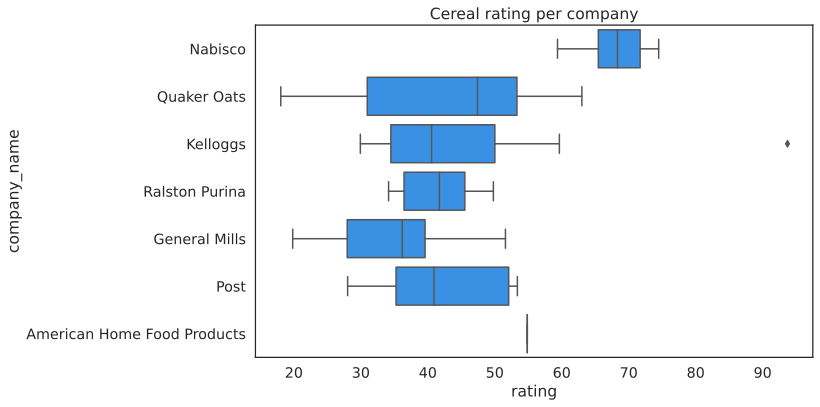

In [7]:
sns.set_theme(
    rc={'figure.figsize': (10, 6), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    # seaborn's boxplot
    ax = sns.boxplot(
        data=data,
        x='rating',
        y='company_name',
        color='dodgerblue',
    )
    
    ax.set_title('Cereal rating per company')

From this chart, we can see that it is not relevant to compare companies that have very few ratings. For example, here the American Home Food Products has received only 1 rating.

### Exercise 3
Find and visualize the **mean ratings per product**. You will find the necessary data in the `data` DataFrame.

In [8]:
data = cereals[['name', 'rating']].groupby('name').mean().reset_index()

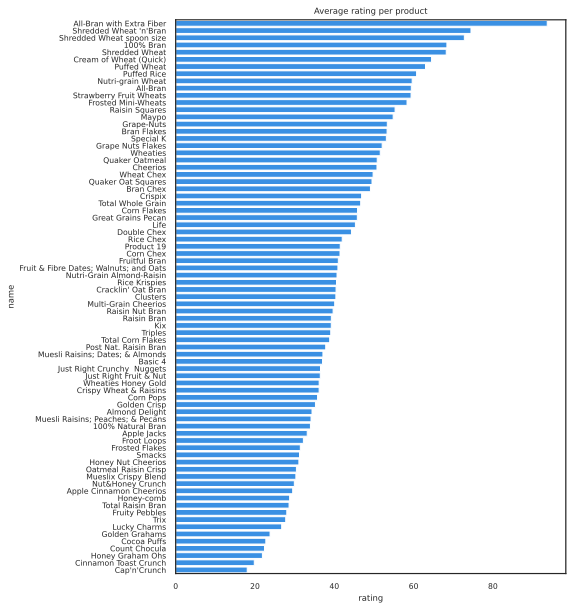

In [9]:
sns.set_theme(
    rc={'figure.figsize': (7, 10), 'font.family': [FONT_FAMILY]}, 
    style='white'
)
with sns.plotting_context("notebook", font_scale=0.7):
    # seaborn's countplot
    ax = sns.barplot(
        data=data,
        y='name',
        x='rating',
        order=data.sort_values('rating', ascending=False).name,
        color='dodgerblue'
    )
    ax.set_title('Average rating per product')

### Exercise 4
Find if there is a **correlation between any of the numerical features** we have in the dataset. Again, you will find the data needed in the `data` DataFrame.

In [10]:
data = cereals[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'rating']]

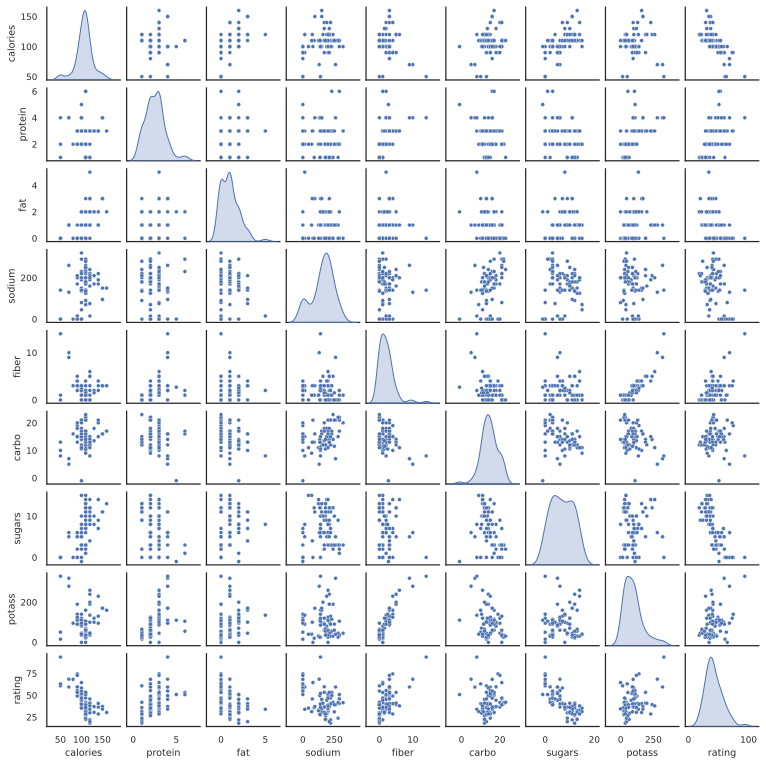

In [11]:
sns.set_theme(
    rc={'font.family': [FONT_FAMILY]}, 
    style='white'
)

with sns.plotting_context("notebook", font_scale=0.8): 
    sns.pairplot(
        data, kind="scatter", palette="Set2", 
        height=1.2, plot_kws={"s": 15},
        diag_kind='kde'
    )

As we can see from the plots, the features are mostly not correlated. There is a somewhat weak negative correlation between the amount of sugar and rating, a weak positive correlation between the amount of fiber and potassium and a somewhat weak negative correlation between calories and rating.

### Exercise 5
Your next task is to find and visualize these correlations in a more **quantitative** way. The data will be ready for you in the `data` DataFrame, you will only have to find the correct visualization method and supply the correct arguments to the function.

In [12]:
data = cereals[['fiber', 'potass', 'sugars', 'calories','rating']]

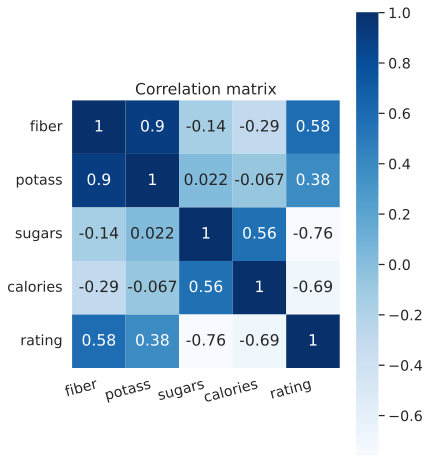

In [13]:
sns.set_theme(
    rc={'figure.figsize':(6, 8), 'font.family': [FONT_FAMILY]}, 
    style='white'
)

with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    correlation_matrix = data.corr()
    ax = sns.heatmap(
        data=correlation_matrix,
        cmap='Blues',
        annot=True,
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=15,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
    )
    ax.set_title('Correlation matrix')

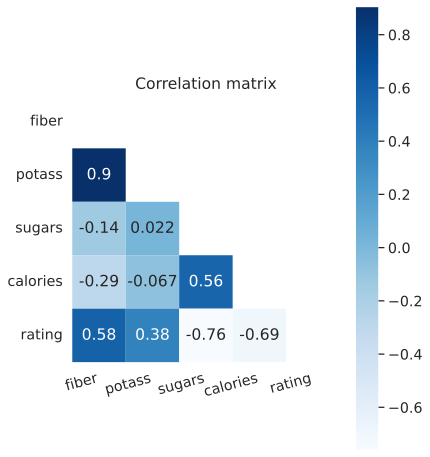

In [14]:
# here you can find an alternative solution with a diagonal correlation matrix

sns.set(
    rc={'figure.figsize':(6, 8), 'font.family': [FONT_FAMILY]}, 
    style='white'
)

with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    correlation_matrix = data.corr()
    # Generate a mask to cover the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    ax = sns.heatmap(
        data=correlation_matrix,
        cmap='Blues',
        annot=True,
        square=True,
        mask=mask
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=15,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
    )
    ax.set_title('Correlation matrix')

### Exercise 6
Using a scatterplot, plot the **potassium amount changes w.r.t. the fiber amount and the rating**. Notice that this requires you to plot three numerical variables at the same time. The data to be used is ready for you in the `data` DataFrame.

In [15]:
data = cereals[['potass', 'fiber', 'rating']]

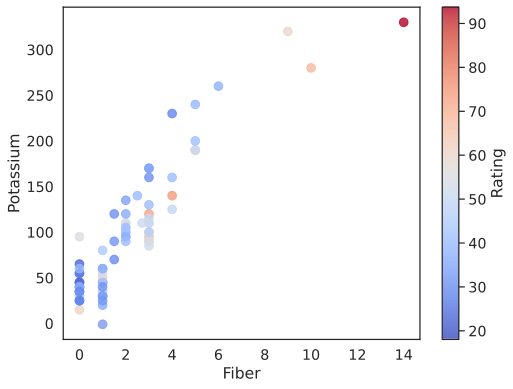

In [16]:
sns.set(
    rc={'figure.figsize':(8, 6), 'font.family': [FONT_FAMILY]}, 
    style='white'
)

with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    fig, ax = plt.subplots()

    sc = ax.scatter(
        data.fiber, data.potass, c=data.rating, 
        alpha=0.8, cmap="coolwarm", s=75
    )
    ax.set_xlabel('Fiber')
    ax.set_ylabel('Potassium')
    
    cbar = fig.colorbar(sc)
    cbar.set_label("Rating")

### Exercise 7
Using a scatterplot, plot **the potassium amount w.r.t. to the fiber amount, the sugar amount and the rating**. Notice that this will required you to find a visualization allowing to display four variables at once. The data to be used is ready for you in the `data` DataFrame. 

You might find some useful information [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter).

In [17]:
data = cereals[['potass', 'fiber', 'sugars', 'rating']]

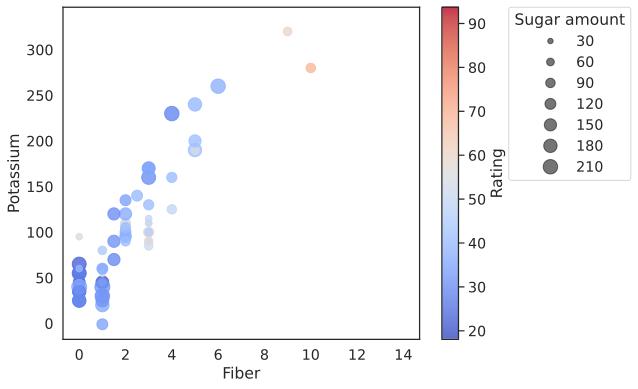

In [18]:
# write your code here
sns.set_theme(
    rc={'figure.figsize':(8, 6), 'font.family': [FONT_FAMILY]}, 
    style='white'
)

with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    fig, ax = plt.subplots()

    # multiply the amount of sugar by 15 two make it more obvious from the chart
    sc = ax.scatter(
        data.fiber, data.potass, s=15*data.sugars, c=data.rating, 
        alpha=0.8, cmap="coolwarm"
    )
    ax.set_xlabel('Fiber')
    ax.set_ylabel('Potassium')
    cbar = fig.colorbar(sc)
    cbar.set_label("Rating")

    # these two lines are used to determine the position of the legend
    handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
    legend2 = ax.legend(
        handles, labels, loc="upper left", title="Sugar amount", 
        bbox_to_anchor=(1.25, 1), borderaxespad=0
    )

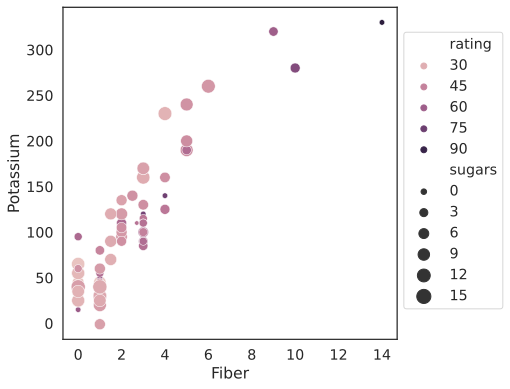

In [19]:
# an alternative solution with seaborn
sns.set_theme(
    rc={'figure.figsize':(6, 6), 'font.family': [FONT_FAMILY]}, 
    style='white'
)

with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    ax = sns.scatterplot(
        data=data, x="fiber", y="potass", 
        hue="rating", size="sugars", sizes=(20,200)
    )
    ax.set_xlabel('Fiber')
    ax.set_ylabel('Potassium')
    # this line here is for determining the position of the legend
    plt.legend(bbox_to_anchor=(1.02, 0.925), loc='upper left', borderaxespad=0)

## Conclusion

Through a combination of different plotting techniques, we were able to visually identify several interesting properties of this dataset. We found out which are the highest-rated cereal brands and how the ratings compare between different cereal manufacturers. We also looked into correlations between cereal contents and assigned ratings and found that fiber (and, to a smaller extent, potassium) positively correlate with the rating. Conversly, sugar contents seemed to inversly correlate with the cereal rating - a somewhat surprising finding, which you may want to pursue further! If you are interested, here are some additional questions you could try to answer using this dataset (either by applying more/different kinds of visualizations, simply wrangling the DataFrame itself or by doing some literature search):
- is the correlation between fiber and potassium content known? are these two linked? if yes, how?
- for any of the found correlations - how significant are they? 
- in the last figure you can see a point in the top-right corner which has the highest amount of fiber and potassium, but also a very high rating and a rather low sugar content - can you find out which cereal brand it was?
- for the same point, can you find out how many ratings it got compared to others? is it even significant?

**Thank you for sticking around until the end of the book!**